In [1]:
import numpy as np
import tensorflow as tf
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from __future__ import division

In [2]:
area = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167, 7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
price = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221, 2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])

n_instances = len(area)
n_features = 1

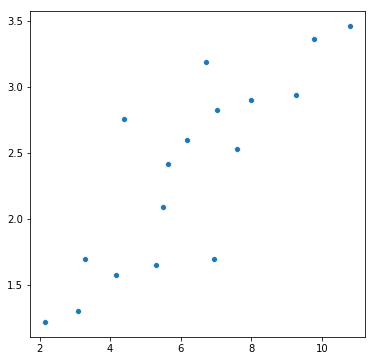

In [3]:
plt.figure(figsize=(6, 6))
sns.scatterplot(area, price)

### Implement LinearRegression Algorithm

Step0, theta0:0.004, theta1:0.028, cost:0.15295922756195068
Step1000, theta0:0.195, theta1:0.337, cost:0.005853414069861174
Step2000, theta0:0.311, theta1:0.320, cost:0.005390560254454613
Step3000, theta0:0.405, theta1:0.307, cost:0.005089004524052143
Step4000, theta0:0.481, theta1:0.296, cost:0.00489253643900156
Step5000, theta0:0.542, theta1:0.288, cost:0.004764535464346409
Step6000, theta0:0.592, theta1:0.281, cost:0.0046811397187411785
Step7000, theta0:0.632, theta1:0.275, cost:0.004626807291060686
Step8000, theta0:0.664, theta1:0.271, cost:0.004591407719999552
Step9000, theta0:0.690, theta1:0.267, cost:0.004568344447761774


/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


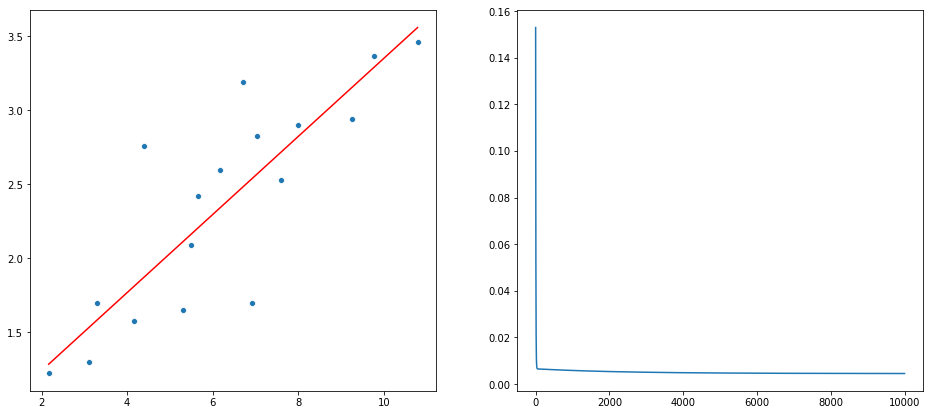

In [4]:
X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, n_features])
Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, 1])

theta0 = tf.Variable(0.0, name='theta0')
theta1 = tf.Variable(0.0, name='theta1')

y_pred = theta0 + theta1*X

cost_function = (1.0/(2*n_instances))*tf.reduce_mean(tf.pow(y_pred - Y, 2))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.03).minimize(cost_function)

feed_dict = {
    X : area.reshape(-1, 1),
    Y : price.reshape(-1, 1)
}
all_cost = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10000):
        sess.run(optimizer, feed_dict)
        
        all_cost.append(sess.run(cost_function, feed_dict))
        if(step % 1000 == 0):
            t0 = sess.run(theta0)
            t1 = sess.run(theta1)
            cost = sess.run(cost_function, feed_dict)
            print(f"Step{step}, theta0:{t0:.3f}, theta1:{t1:.3f}, cost:{cost}")
            
    plt.figure(figsize=(16,7))
    plt.subplot(121)
    sns.scatterplot(area, price)
    sns.lineplot(area, sess.run(y_pred, feed_dict).flatten(), c='r')
    plt.subplot(122)
    sns.lineplot(x=np.arange(10000), y=all_cost)
    plt.show()